In [45]:
#remove movies with budget 0

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.DataFrame()
df = pd.read_csv("movies10k.csv")


#df = df.loc[df['budget'] != 0]

df['budget'] = df['budget'].apply(lambda x: np.nan if x <= 500000 else x)


df = df.dropna(subset=['budget']).reset_index(drop=True)



In [13]:
#remove movies with less than 20 votes

df = df.loc[df['vote_count'] >= 20]




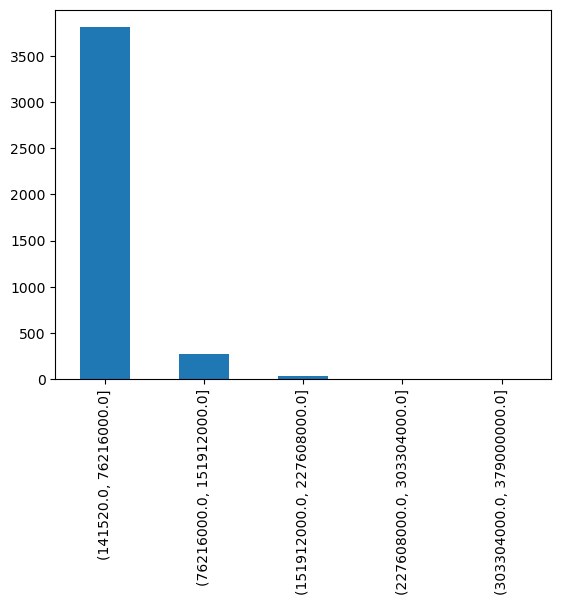

In [47]:
pd.cut(df['budget'], bins=5).value_counts().sort_index().plot.bar()
plt.show()

Text(0.5, 1.0, 'Budget vs Ratings')

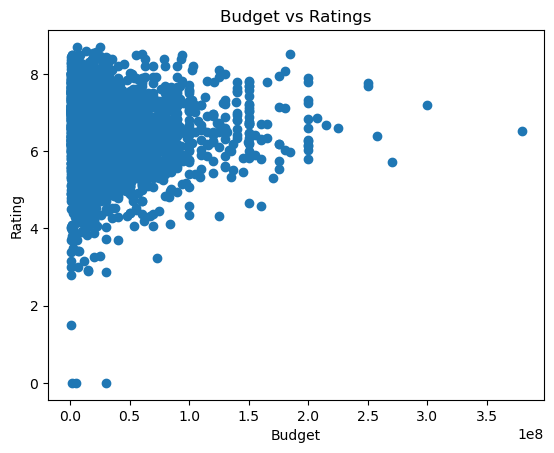

In [44]:
plt.scatter(df['budget'], df['vote_average'])

plt.xlabel('Budget')
plt.ylabel('Rating')
plt.title('Budget vs Ratings')
